<a href="https://colab.research.google.com/github/Georgia-MAX-holic/R6_data_stduy/blob/main/R6_data_pandas_%20Final_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [444]:
!pip install scikit-learn



!pip install category_encoders


!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [445]:
from google.colab import drive
import pandas as pd
from scipy import stats
from numpy import mean
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    

from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

drive.mount('/content/drive')
filetitle = '/content/drive/My Drive/cpding/asdf/Game_data_EDA.csv'

df = pd.read_csv(filetitle)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [446]:
df

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Null,Critic_Score,Critic_Count,User_Score,User_Count,Unnamed: 17,Rating
0,0.0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.100168,76.0,51.0,8,322.0,NaN,E
1,NaN,NaN,PUBG,Series,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
3,448.0,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.986230,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,2017.0,Shooter,PUBG Corporation,NaN,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40714,NaN,NaN,Hyper Light Drifter,PSV,2017.0,Role-Playing,Rebellion Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40715,NaN,NaN,Hyper Light Drifter,Linux,2017.0,Role-Playing,Rebellion Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40716,NaN,NaN,Hyperdevotion Noire: Goddess Black Heart,PC,2017.0,Role-Playing,Idea Factory International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40717,NaN,NaN,Sniper: Ghost Warrior 3,Wii,2017.0,Shooter,City Interactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
df_score = df[["Critic_Score","User_Score"]]

df_global = df[["Name","Year","Platform","Genre","Publisher","Global_Sales"]]

In [448]:
df=df[["Name","Year","Platform","Genre","Publisher","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].dropna()
df

,Name,Year,Platform,Genre,Publisher,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,Wii,Sports,Nintendo,41.49,3.77,29.02,8.46,82.74
2,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24
3,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24
5,Mario Kart Wii,2008.0,Wii,Racing,Nintendo,15.85,3.79,12.88,3.31,35.82
6,Wii Sports Resort,2009.0,Wii,Sports,Nintendo,15.75,3.28,11.01,2.96,33.00
...,...,...,...,...,...,...,...,...,...,...
35353,Super Battle For Money Sentouchuu: Kyuukyoku n...,2016.0,3DS,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
35354,Coven and Labyrinth of Refrain,2016.0,PSV,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
35355,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01
35356,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01


In [449]:
df.isnull().sum()

Name            0
Year            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
JP_Sales        0
EU_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [450]:
pipe_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)   

In [451]:
model = LinearRegression()

In [485]:

def score (X_train_name , y_train_name): # 단순 선형 , 
  
    X_train = df[[X_train_name]]
    y_train = df[[y_train_name]]
    model.fit(X_train, y_train)

    y_pred = model.predict(df.loc[:, [X_train_name]])
  
    df["compare"].fillna(pd.Series(y_pred.flatten()), inplace=True) # null 값 대체 가능

    return y_pred

def del_coloum_list(column) :
   df.drop(column,axis = 'columns')

   return df      



def multi_linear (x1, x2 ,x3 ,y1):
   x = df[[x1,x2,x3]]
   y = df[[y1]]
   x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)
   model.fit(x_train, y_train)
   y_pred = model.predict(x_test)
   result=df['Null'].fillna(pd.Series(y_pred.flatten()), inplace=True)
   
   return result



def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)


def R_forest_show_chart (x, y, number , name):
    %%time
    n = number
    x_train, x_test, y_train, y_test = train_test_split(x ,y, train_size = 0.7, test_size = 0.3)
    pipe_ord.fit(x_train, y_train)
    print(1)


    enc = pipe_ord.named_steps['ordinalencoder']
  
    encoded = enc.transform(x_train)
 

    rf_ord = pipe_ord.named_steps['randomforestclassifier']
    importances_ord = pd.Series(rf_ord.feature_importances_, x_train.columns)
 
    plt.figure(figsize=(10,n/4))

    plt.title(f'Top {n} features with ordinalencoder {name}')

    print('Ordinal shape: ', encoded.shape)
    print('검증 정확도', pipe_ord.score(x_test, y_test))

    return importances_ord.sort_values()[-n:].plot.barh();


def onehot_Random_tree (X,Y,number, name):

   HOT_df=encoder.fit_transform(df[X])
   
   x_Genre = HOT_df[list(HOT_df.columns)]

   y_Global_Sales = df[[Y]].astype(int)

   print("setting")
   return R_forest_show_chart(x_Genre, y_Global_Sales ,number , name)



In [453]:

#mae = mean_absolute_error(y_test, y_pred)
#print(f'훈련 에러: {mae:.2f}')
df
 # .fillna(pd.Series(y_pred.flatten()), inplace=True) # null 값 대체 가능


,Name,Year,Platform,Genre,Publisher,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,Wii,Sports,Nintendo,41.49,3.77,29.02,8.46,82.74
2,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24
3,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24
5,Mario Kart Wii,2008.0,Wii,Racing,Nintendo,15.85,3.79,12.88,3.31,35.82
6,Wii Sports Resort,2009.0,Wii,Sports,Nintendo,15.75,3.28,11.01,2.96,33.00
...,...,...,...,...,...,...,...,...,...,...
35353,Super Battle For Money Sentouchuu: Kyuukyoku n...,2016.0,3DS,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
35354,Coven and Labyrinth of Refrain,2016.0,PSV,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
35355,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01
35356,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01


In [454]:

#df[y_train_name].fillna(pd.Series(y_pred.flatten()), inplace=True) # null 값 대체 가능

In [455]:
df["compare"] =  np.nan
df

,Name,Year,Platform,Genre,Publisher,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,compare
0,Wii Sports,2006.0,Wii,Sports,Nintendo,41.49,3.77,29.02,8.46,82.74,NaN
2,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24,NaN
3,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24,NaN
5,Mario Kart Wii,2008.0,Wii,Racing,Nintendo,15.85,3.79,12.88,3.31,35.82,NaN
6,Wii Sports Resort,2009.0,Wii,Sports,Nintendo,15.75,3.28,11.01,2.96,33.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35353,Super Battle For Money Sentouchuu: Kyuukyoku n...,2016.0,3DS,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,NaN
35354,Coven and Labyrinth of Refrain,2016.0,PSV,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01,NaN
35355,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01,NaN
35356,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01,NaN


In [456]:
score ("NA_Sales" , "JP_Sales")

array([[5.12856465],
       [3.59862981],
       [3.59862981],
       ...,
       [0.01357703],
       [0.01357703],
       [0.01357703]])

In [457]:
stats.ttest_ind(df["NA_Sales"],df["EU_Sales"])  # 지역끼리 선호하는 장르는 크게 다르지 않음 / 선호하는 장르가 달랐다면 P-value 값에 어느정도 차이가 났을것

Ttest_indResult(statistic=24.602329198652566, pvalue=4.488216995893726e-133)

In [458]:


#df = pd.merge(df, df_call, on="Name" ,how="inner")
#df.to_csv("Game_data2222.csv")


In [459]:
df

,Name,Year,Platform,Genre,Publisher,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,compare
0,Wii Sports,2006.0,Wii,Sports,Nintendo,41.49,3.77,29.02,8.46,82.74,5.128565
2,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24,3.598630
3,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24,1.967603
5,Mario Kart Wii,2008.0,Wii,Racing,Nintendo,15.85,3.79,12.88,3.31,35.82,1.402970
6,Wii Sports Resort,2009.0,Wii,Sports,Nintendo,15.75,3.28,11.01,2.96,33.00,2.873729
...,...,...,...,...,...,...,...,...,...,...,...
35353,Super Battle For Money Sentouchuu: Kyuukyoku n...,2016.0,3DS,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,NaN
35354,Coven and Labyrinth of Refrain,2016.0,PSV,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01,NaN
35355,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01,NaN
35356,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01,NaN


In [460]:
df_visual=df[["Name","Global_Sales"]]
df_visual.set_index('Name', inplace = True)

will=df_visual.idxmax(axis=0, skipna=True)
print(will)
df.loc [[0], :]

#가장 많이 팔린 제품은 Will sports

Global_Sales    Wii Sports
dtype: object


,Name,Year,Platform,Genre,Publisher,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,compare
0,Wii Sports,2006.0,Wii,Sports,Nintendo,41.49,3.77,29.02,8.46,82.74,5.128565


In [461]:
df["find"]=df["compare"]<df["JP_Sales"]


In [462]:

df_find=df[["Name","Platform","Genre","Publisher","JP_Sales","compare","find"]]

In [463]:
df_True = df_find[df_find["find"]==True]


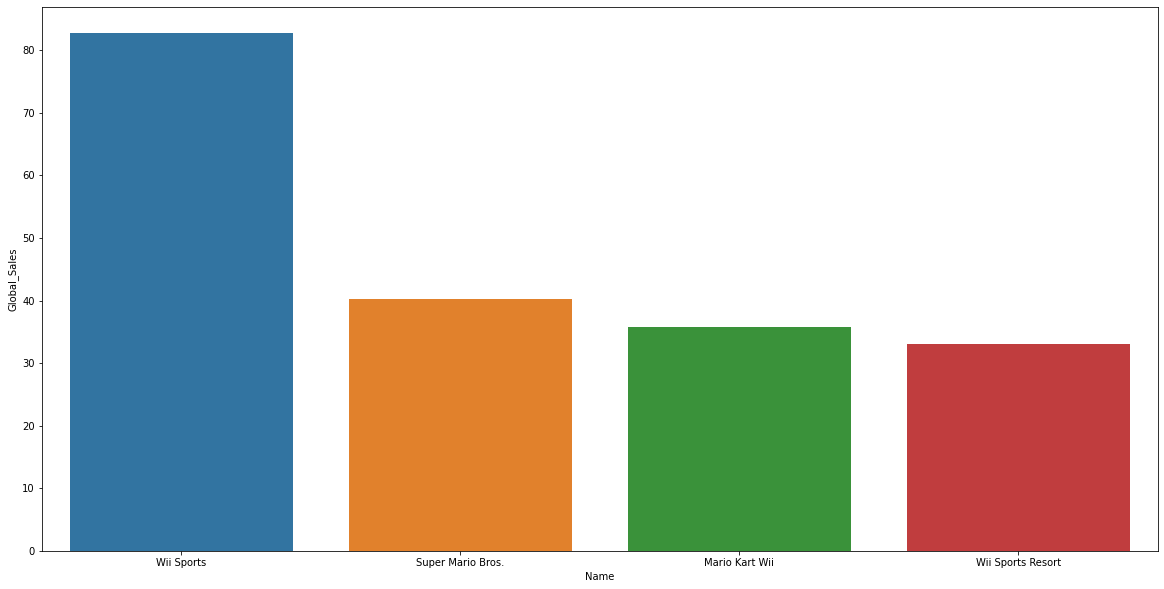

In [464]:
top5_visual=df.loc [[0,2,3,5,6]]
plt.figure(figsize=(20,10))
sns.barplot(x='Name', y='Global_Sales', data=top5_visual) 

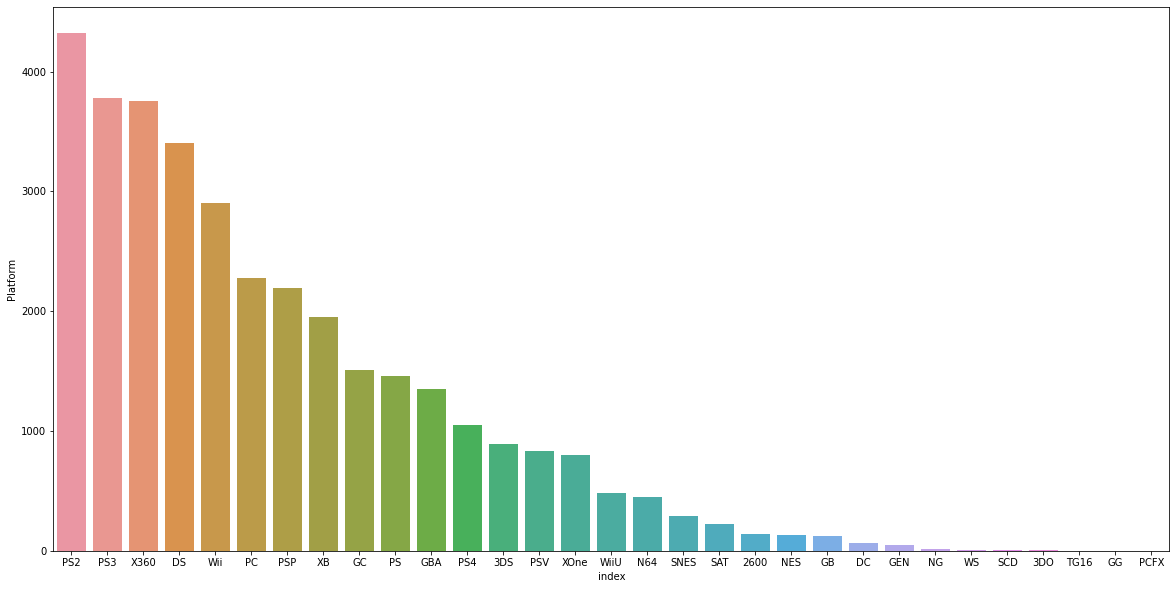

In [465]:

console_df=pd.DataFrame(df["Platform"].value_counts()).reset_index()
plt.figure(figsize=(20,10))

sns.barplot(x=console_df["index"], y=console_df["Platform"], data=console_df) 
#게임 플랫폼 수량

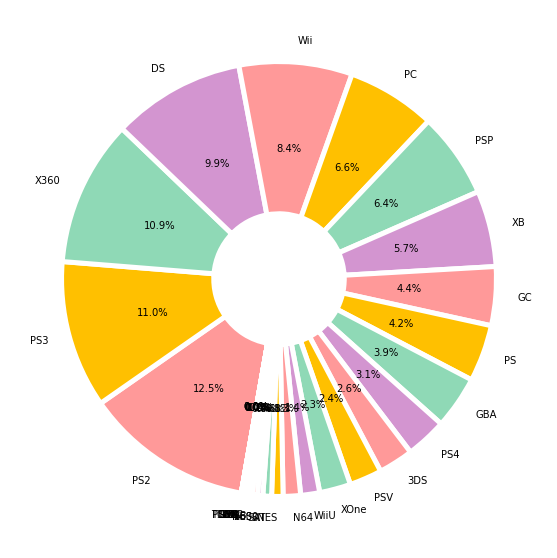

In [466]:
plt.figure(figsize=(20,10))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(console_df["Platform"], labels=console_df["index"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [467]:

release_date_sale =  df.groupby('Year')['Global_Sales'].sum().reset_index()
release_date_sale = release_date_sale.drop([0])
# Total Game Sales by release_date

visual = go.Figure(go.Bar(x=release_date_sale['Year'],y=release_date_sale['Global_Sales'],marker={'color': release_date_sale['Global_Sales'],'colorscale': 'Viridis'}))
visual.update_layout(title_text='Gloval Sales',xaxis_title="Genre 	",yaxis_title="Sum of Sales")
visual.show()

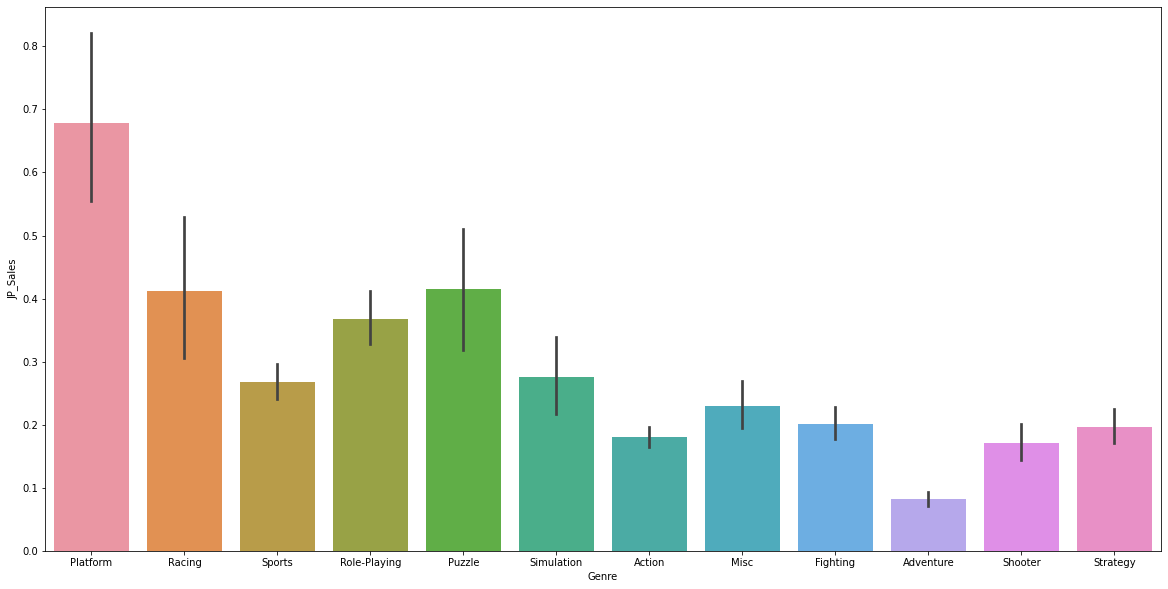

In [468]:

find_df=pd.DataFrame(df_True["Genre"].value_counts()).reset_index()
plt.figure(figsize=(20,10))

sns.barplot(x=df_True["Genre"], y=df_True["JP_Sales"], data=df_True) 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

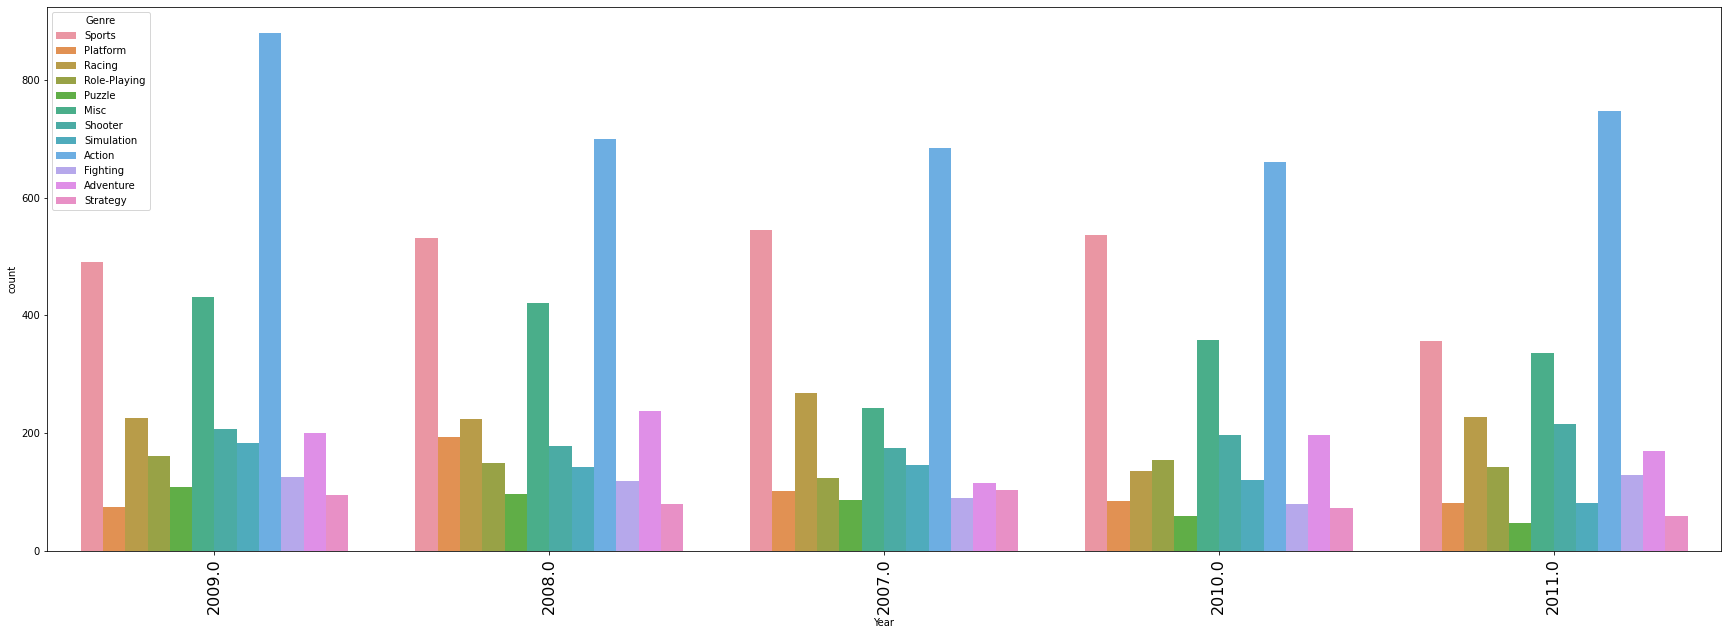

In [469]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

In [470]:

df=df.drop(["find"], axis=1)


In [471]:
df

,Name,Year,Platform,Genre,Publisher,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,compare
0,Wii Sports,2006.0,Wii,Sports,Nintendo,41.49,3.77,29.02,8.46,82.74,5.128565
2,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24,3.598630
3,Super Mario Bros.,1985.0,NES,Platform,Nintendo,29.08,6.81,3.58,0.77,40.24,1.967603
5,Mario Kart Wii,2008.0,Wii,Racing,Nintendo,15.85,3.79,12.88,3.31,35.82,1.402970
6,Wii Sports Resort,2009.0,Wii,Sports,Nintendo,15.75,3.28,11.01,2.96,33.00,2.873729
...,...,...,...,...,...,...,...,...,...,...,...
35353,Super Battle For Money Sentouchuu: Kyuukyoku n...,2016.0,3DS,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,NaN
35354,Coven and Labyrinth of Refrain,2016.0,PSV,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01,NaN
35355,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01,NaN
35356,Turok,2008.0,PC,Action,Touchstone,0.00,0.00,0.01,0.00,0.01,NaN


In [472]:
encoder = OneHotEncoder(use_cat_names= True)



In [473]:

HOT_df_Genre=HOT_df=encoder.fit_transform(df["Platform"])



setting
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1
Ordinal shape:  (24129, 31)
검증 정확도 0.8522386616381394
setting
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1
Ordinal shape:  (24129, 31)
검증 정확도 0.9906198626825259
setting
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1
Ordinal shape:  (24129, 31)
검증 정확도 0.9367565999419786


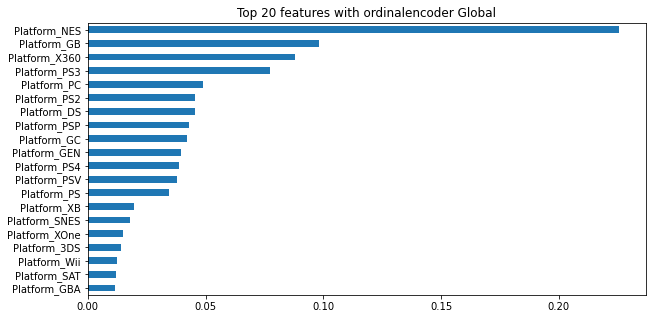

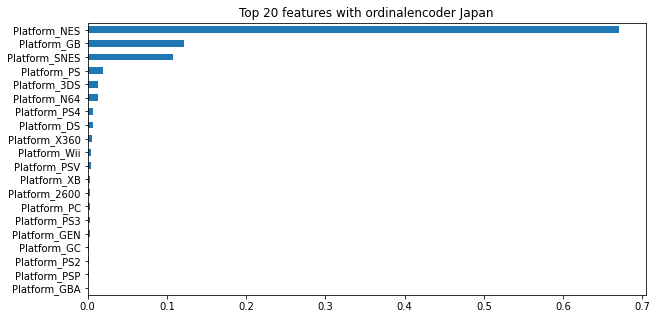

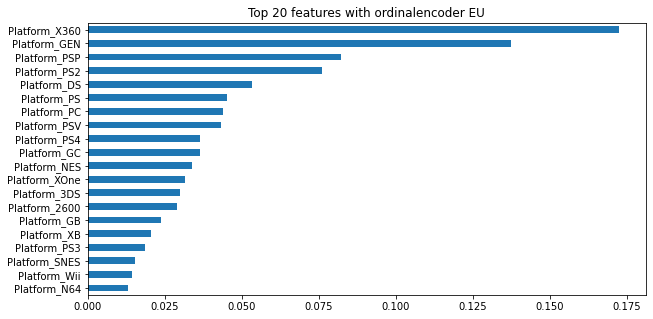

In [486]:
onehot_Random_tree ("Platform","Global_Sales", 20, "Global")
#PS2는 게임 많이 만들었지만 쓸모는 없었다 .

#세계 총 매출에 어떤 플랫폼이 가장 기여를 하였는지 

# 일본 판매량의 플랫폼 관여성, -> 패미컴이
onehot_Random_tree ("Platform","JP_Sales", 20 , "Japan")
onehot_Random_tree ("Platform","NA_Sales", 20, "EU")

setting
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1
Ordinal shape:  (24129, 12)
검증 정확도 0.9903297553428102
setting
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1
Ordinal shape:  (24129, 12)
검증 정확도 0.8503046127067014
setting
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1
Ordinal shape:  (24129, 12)
검증 정확도 0.9314379653805241


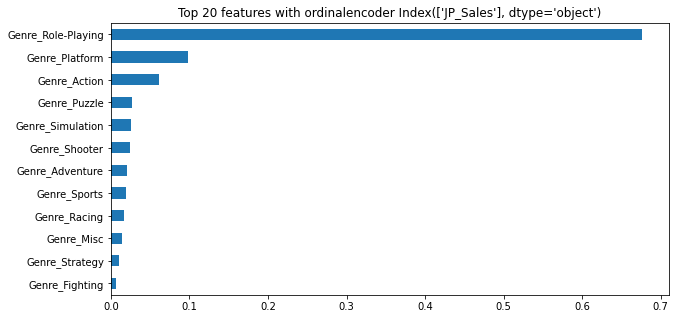

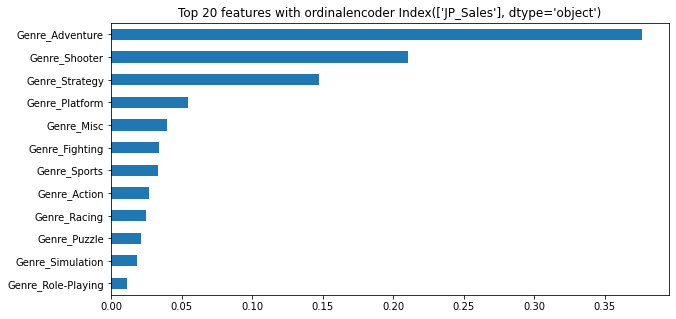

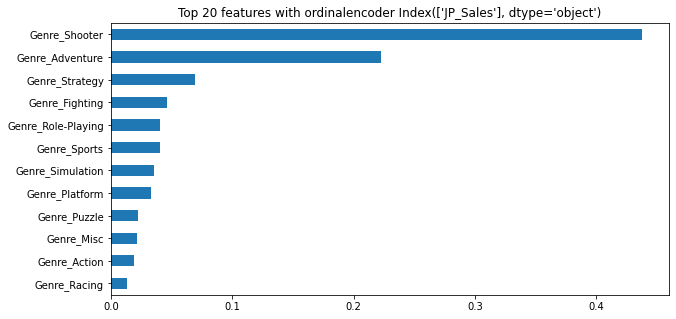

In [480]:

#HOT_df_Genre=HOT_df=encoder.fit_transform(df["Genre"])
onehot_Random_tree ("Genre","JP_Sales",20)

#세계 매출에 가장 기여한 장르
onehot_Random_tree ("Genre","Global_Sales",20)
onehot_Random_tree ("Genre","NA_Sales",20)